In [1]:
%cd ../src/

/mnt/c/Users/Jacob/Desktop/prosjektoppgave/testing/gymming/src


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

from utils import prepare_folders

In [3]:
prepare_folders("../figures/")

In [4]:
# Generate data
np.random.seed(0)
n_samples = 200
X = np.random.rand(n_samples, 3)
y = (X[:, 0] + X[:, 1] + X[:, 2] > 1.5).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Train a linear classifier
clf = linear_model.SGDClassifier(loss="log_loss")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [6]:
# Get the coefficients of the decision boundary
coefficients = clf.coef_[0]
intercept = clf.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept) # Doesn't matter for orthogonal vector

norm = np.linalg.norm(coefficients)
normalized_coefficients = coefficients / norm
print("Normalized coefficients:", normalized_coefficients)

# Negate the coefficients to get the orthogonal vector towards class 0
cav = -normalized_coefficients
print("Orthogonal vector:", cav)

Coefficients: [19.22345861 20.26759101 18.18988951]
Intercept: -30.720867738802212
Normalized coefficients: [0.57668363 0.60800651 0.54567764]
Orthogonal vector: [-0.57668363 -0.60800651 -0.54567764]


Cosine similarities: [-0.85905384 -0.86960508 -0.92458489 -0.97912832 -0.93690978 -0.97967391
 -0.80362925 -0.90835459 -0.96107944 -0.88552828]


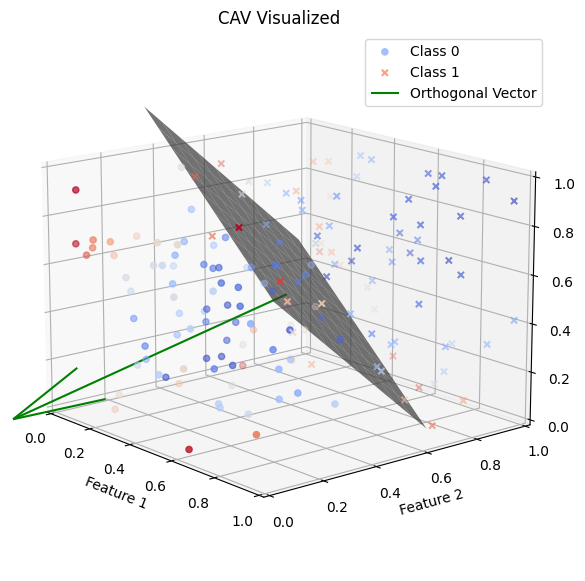

In [7]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=-40)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Use cosine similarity on training data and orthogonal vector
cosine_similarities = np.dot(X_train, cav)/(np.linalg.norm(X_train, axis=1) * np.linalg.norm(cav))
print("Cosine similarities:", cosine_similarities[:10])

# Plot points from class 0 and class 1
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]
# Color by cosine similarity
ax.scatter(X_train[class_0_indices, 0], X_train[class_0_indices, 1], X_train[class_0_indices, 2], marker='o', label='Class 0', c=cosine_similarities[class_0_indices], cmap='coolwarm')
ax.scatter(X_train[class_1_indices, 0], X_train[class_1_indices, 1], X_train[class_1_indices, 2], marker='x', label='Class 1', c=cosine_similarities[class_1_indices], cmap='coolwarm')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0.2, 0.8, 10), np.linspace(0.2, 0.8, 10))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.7)

# Plot the orthogonal vector
start_point = [0.5,0.5,0.5]
ax.quiver(start_point[0], start_point[1], start_point[2],
          cav[0], cav[1], cav[2],
          color='green', label='Orthogonal Vector')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('CAV Visualized')

plt.legend()
plt.savefig('../figures/cav_visualized_0.png')
plt.show()

In [8]:
distance_origin = abs(intercept) / np.linalg.norm(coefficients)
print("Distance from origin:", distance_origin)
origin_vector = cav * distance_origin
# Transform the data around the decision boundary
X_train = X_train + origin_vector
X_test = X_test + origin_vector
clf.intercept_[0] = 0

Distance from origin: 0.9215938607549109


Cosine similarities: [-0.27020334  0.86310044  0.94684451  0.97326022 -0.5528389   0.96163153
  0.69757049 -0.3109887   0.18224874  0.57226427]


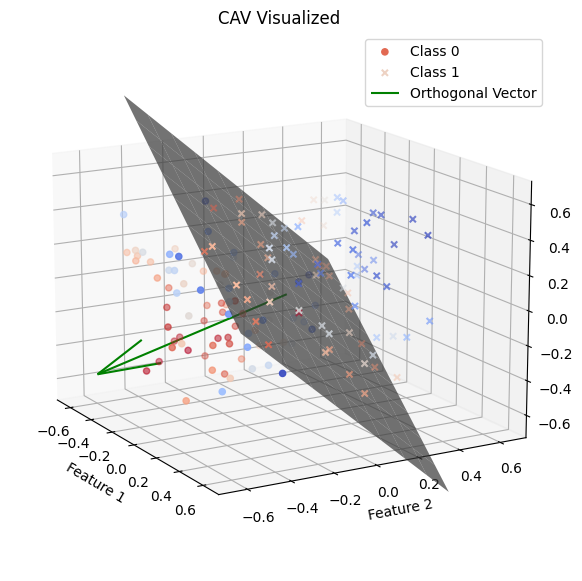

In [9]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=-30)

ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.set_zlim(-0.7, 0.7)

# Use cosine similarity on training data and orthogonal vector
cosine_similarities = np.dot(X_train, cav)/(np.linalg.norm(X_train, axis=1) * np.linalg.norm(cav))
print("Cosine similarities:", cosine_similarities[:10])

# Color by cosine similarity
ax.scatter(X_train[class_0_indices, 0], X_train[class_0_indices, 1], X_train[class_0_indices, 2], marker='o', label='Class 0', c=cosine_similarities[class_0_indices], cmap='coolwarm')
ax.scatter(X_train[class_1_indices, 0], X_train[class_1_indices, 1], X_train[class_1_indices, 2], marker='x', label='Class 1', c=cosine_similarities[class_1_indices], cmap='coolwarm')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, 10), np.linspace(-0.5, 0.5, 10))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.7)

# Plot the orthogonal vector
start_point = [0,0,0]
ax.quiver(start_point[0], start_point[1], start_point[2],
          cav[0], cav[1], cav[2],
          color='green', label='Orthogonal Vector')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('CAV Visualized')

plt.legend()
plt.savefig('../figures/cav_visualized_1.png')
plt.show()

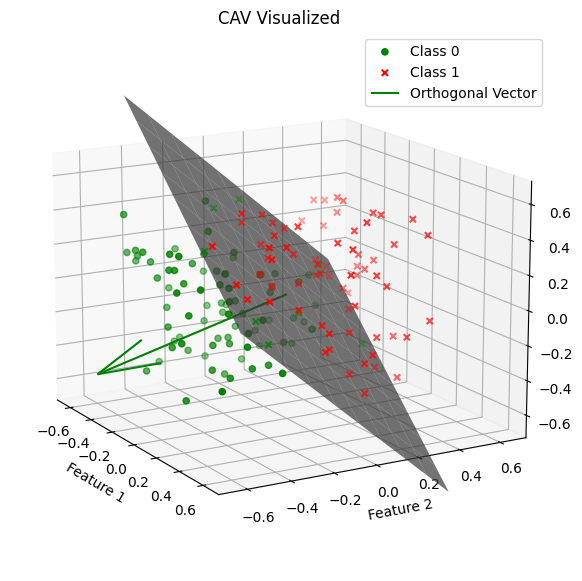

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=-30)

ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.set_zlim(-0.7, 0.7)

# If cosine similarity is positive mark green, else mark red
colors_0 = np.where(cosine_similarities[class_0_indices] > 0, 'green', 'red')
colors_1 = np.where(cosine_similarities[class_1_indices] > 0, 'green', 'red')

# Color by cosine similarity
ax.scatter(X_train[class_0_indices, 0], X_train[class_0_indices, 1], X_train[class_0_indices, 2], marker='o', label='Class 0', c=colors_0)
ax.scatter(X_train[class_1_indices, 0], X_train[class_1_indices, 1], X_train[class_1_indices, 2], marker='x', label='Class 1', c=colors_1)
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.7)

# Plot the orthogonal vector
ax.quiver(start_point[0], start_point[1], start_point[2],
          cav[0], cav[1], cav[2],
          color='green', label='Orthogonal Vector')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('CAV Visualized')

plt.legend()
plt.savefig('../figures/cav_visualized_2.png')
plt.show()